In [11]:
import sys
!{sys.executable} -m pip install catboost --prefer-binary

  Using cached graphviz-0.20.1-py3-none-any.whl.metadata (12 kB)
   --------------------------------------- 101.7/101.7 MB 24.2 MB/s eta 0:00:00
Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


# Î™®Îç∏ÎßÅ

### Ïû¨Î∞òÎì± ÌöüÏàòÏôÄ Í¥ÄÎ†®Îêú Ïª¨ÎüºÎì§ÏùÄ ÌïòÎÇòÏî© ÏÇ¨Ïö©

In [13]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv("final_data_rebounds.csv")

# ÌÉÄÍ≤ü: ÏÉÅÏòÅÏùºÏàò
target = 'ÏÉÅÏòÅÏùºÏàò'
rebound_columns = ['Ïû¨Î∞òÎì±ÌöüÏàò', '3ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò', '7ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò', '10ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò']

# Í≤∞Ï∏° Ï†úÍ±∞ (ÌÉÄÍ≤üÍ≥º Ïû¨Î∞òÎì± Ïª¨Îüº)
df = df.dropna(subset=[target] + rebound_columns)

# Î≤îÏ£ºÌòï Ïª¨Îüº ÏãùÎ≥Ñ
cat_features = df.select_dtypes(include='object').columns.tolist()

# ‚úÖ Î≤îÏ£ºÌòï Ïª¨Îüº NaNÏùÑ 'missing'ÏúºÎ°ú Ï≤òÎ¶¨
df[cat_features] = df[cat_features].fillna('missing')

# Í≤∞Í≥º Ï†ÄÏû•
results = []
trained_models = {}
feature_sets = {}

for rebound in rebound_columns:
    # ÎÇòÎ®∏ÏßÄ Ïû¨Î∞òÎì± Ïª¨ÎüºÏùÄ ÌîºÏ≤òÏóêÏÑú Ï†úÏô∏
    excluded = [col for col in rebound_columns if col != rebound]
    feature_cols = [col for col in df.columns if col != target and col not in excluded]

    X = df[feature_cols]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = CatBoostRegressor(verbose=0, random_seed=42)
    model.fit(X_train, y_train, cat_features=cat_features)

    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'ÏÇ¨Ïö©Ìïú Ïû¨Î∞òÎì± ÌîºÏ≤ò': rebound,
        'MAE': round(mae, 3),
        'R¬≤': round(r2, 3)
    })

    trained_models[rebound] = model
    feature_sets[rebound] = X.columns

# Í≤∞Í≥º Ï∂úÎ†•
results_df = pd.DataFrame(results)
print("üîç ÏòàÏ∏° ÏÑ±Îä• ÎπÑÍµê:")
print(results_df)


üîç ÏòàÏ∏° ÏÑ±Îä• ÎπÑÍµê:
   ÏÇ¨Ïö©Ìïú Ïû¨Î∞òÎì± ÌîºÏ≤ò    MAE     R¬≤
0       Ïû¨Î∞òÎì±ÌöüÏàò  1.332  0.971
1   3ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò  1.070  0.981
2   7ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò  1.043  0.982
3  10ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò  1.158  0.970


# ÌîºÏ≥ê Ï§ëÏöîÎèÑ 


üìä Feature Importance for: Ïû¨Î∞òÎì±ÌöüÏàò


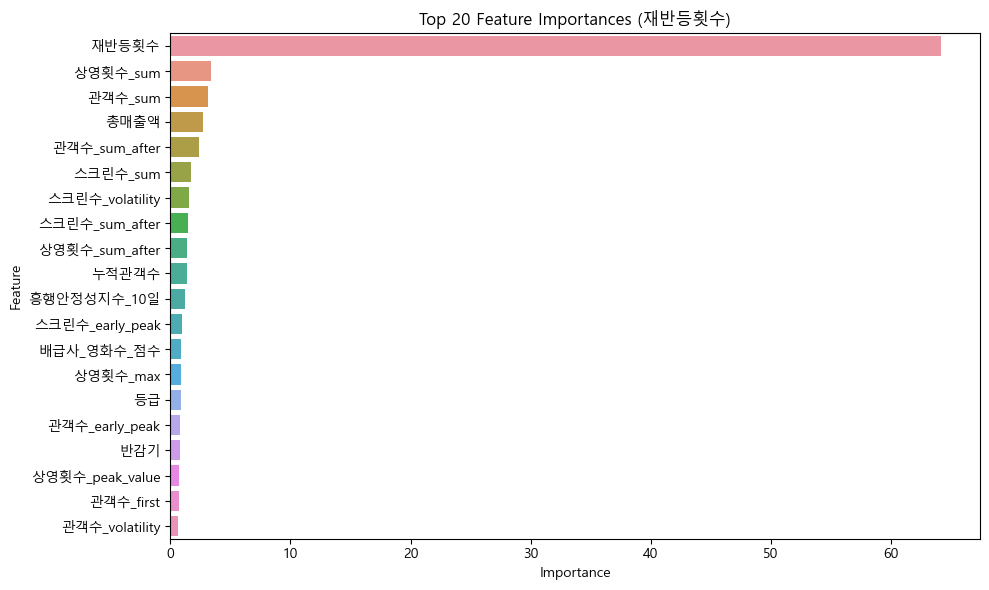


üìä Feature Importance for: 3ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò


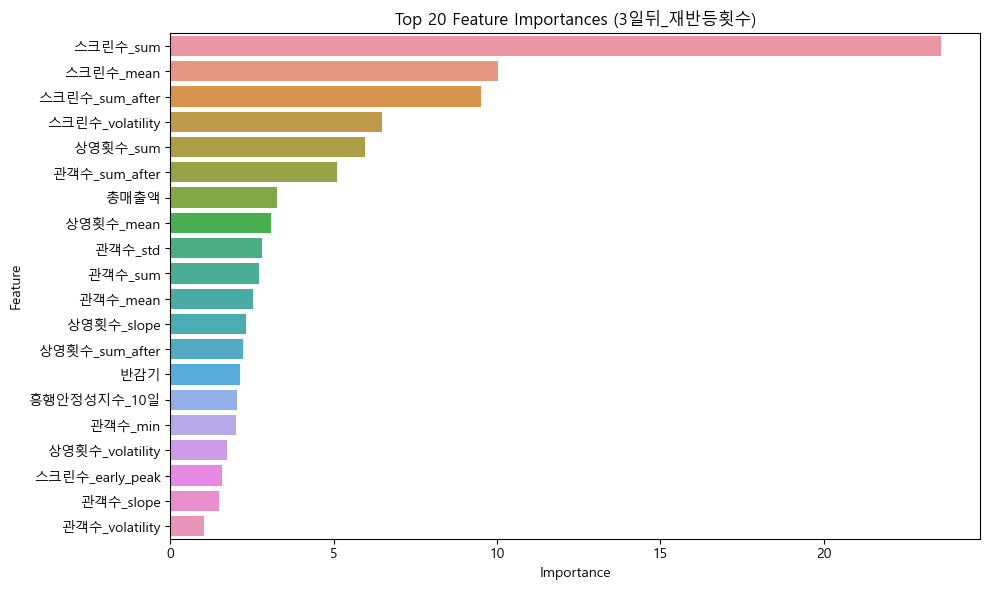


üìä Feature Importance for: 7ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò


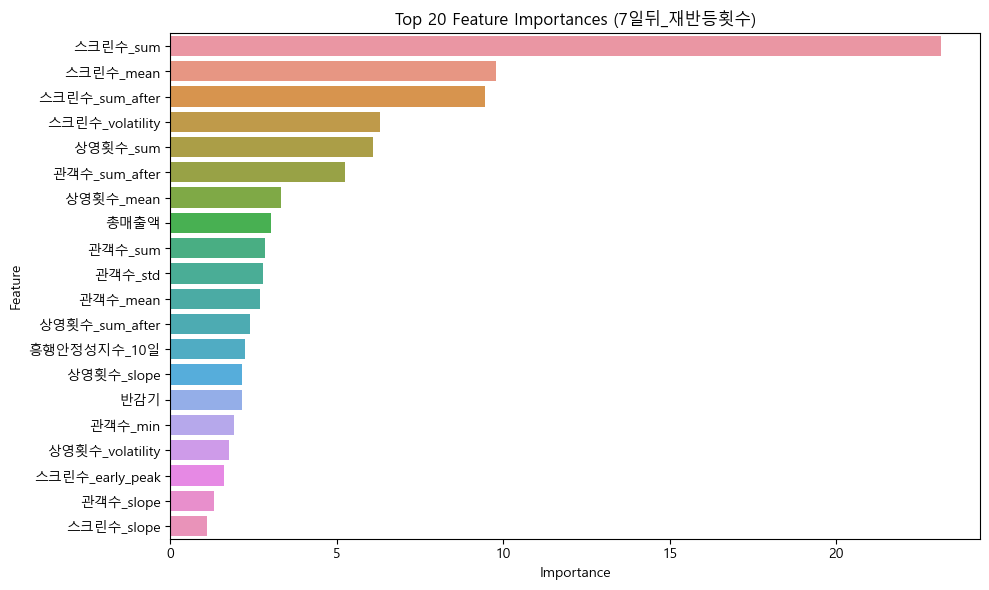


üìä Feature Importance for: 10ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò


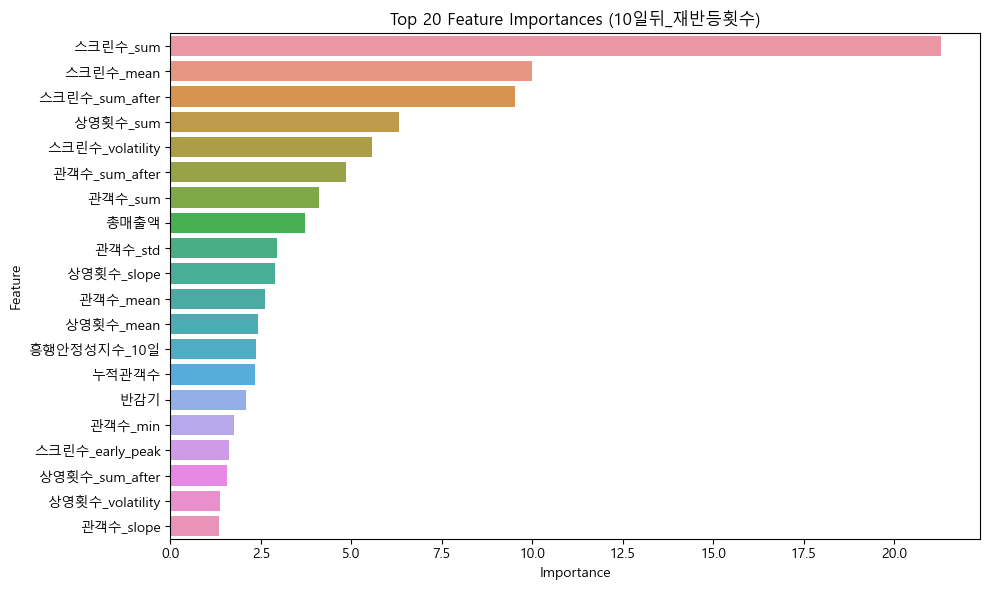

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

def plot_feature_importance(model, feature_names, top_n=20, title_suffix=""):
    importances = model.get_feature_importance()
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f'Top {top_n} Feature Importances ({title_suffix})')
    plt.tight_layout()
    plt.show()

# Î™®Îì† Î™®Îç∏Ïóê ÎåÄÌï¥ ÌîºÏ≤ò Ï§ëÏöîÎèÑ Ï∂úÎ†•
for rebound in rebound_columns:
    print(f"\nüìä Feature Importance for: {rebound}")
    plot_feature_importance(trained_models[rebound], feature_sets[rebound], top_n=20, title_suffix=rebound)


# Î™®Îç∏ÎßÅ (ÏïïÏ∂ï)

In [1]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv("final_data_rebounds.csv")

# ÌÉÄÍ≤ü Î∞è Ïû¨Î∞òÎì± ÌîºÏ≤ò
target = 'ÏÉÅÏòÅÏùºÏàò'
rebound_columns = ['Ïû¨Î∞òÎì±ÌöüÏàò', '3ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò', '7ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò', '10ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò']

# Ïû•Î•¥/Íµ≠Ï†Å Ïõê-Ìï´ Ïª¨Îüº
genre_columns = [col for col in df.columns if col.startswith('Ïû•Î•¥_') and 'Ï†êÏàò' not in col]
nation_columns = [col for col in df.columns if col.startswith('Íµ≠Ï†Å_') and 'Ï†êÏàò' not in col]

# Ïõê-Ìï´ Ïù∏ÏΩîÎî© ÏïïÏ∂ï Ìï®Ïàò
def compress_one_hot(row, columns, prefix):
    active = row[columns]
    if active.isnull().all():
        return 'missing'
    max_val = active.max()
    if pd.isna(max_val):
        return 'missing'
    # ÏµúÎåÄÍ∞íÏùÑ Í∞ÄÏßÄÎäî Î™®Îì† Ïª¨ÎüºÏùò Ï†ëÎëêÏÇ¨ Ï†úÍ±∞ ÌõÑ join
    max_cols = active[active == max_val].index
    categories = [col.replace(f"{prefix}_", "") for col in max_cols]
    return ",".join(categories) if categories else 'missing'

# ÏïïÏ∂ï Ïª¨Îüº ÏÉùÏÑ±
df['Ïû•Î•¥_ÏïïÏ∂ï'] = df.apply(lambda row: compress_one_hot(row, genre_columns, 'Ïû•Î•¥'), axis=1)
df['Íµ≠Ï†Å_ÏïïÏ∂ï'] = df.apply(lambda row: compress_one_hot(row, nation_columns, 'Íµ≠Ï†Å'), axis=1)

# Î™®Îç∏ ÏûÖÎ†•Ïö© Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
df_model = df.drop(columns=genre_columns + nation_columns)
df_model = df_model.dropna(subset=[target] + rebound_columns)

# Î≤îÏ£ºÌòï Ï≤òÎ¶¨
cat_features = df_model.select_dtypes(include='object').columns.tolist()
df_model[cat_features] = df_model[cat_features].fillna('missing')

# Í≤∞Í≥º Ï†ÄÏû•
results = []
trained_models = {}
feature_sets = {}

for rebound in rebound_columns:
    excluded = [col for col in rebound_columns if col != rebound]
    feature_cols = [col for col in df_model.columns if col != target and col not in excluded]

    X = df_model[feature_cols]
    y = df_model[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = CatBoostRegressor(verbose=0, random_seed=42)
    model.fit(X_train, y_train, cat_features=cat_features)

    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'ÏÇ¨Ïö©Ìïú Ïû¨Î∞òÎì± ÌîºÏ≤ò': rebound,
        'MAE': round(mae, 3),
        'R¬≤': round(r2, 3)
    })

    # üîπ Î™®Îç∏ Î∞è ÌîºÏ≤ò Ï†ÄÏû•
    trained_models[rebound] = model
    feature_sets[rebound] = X.columns
    
results_df = pd.DataFrame(results)
print(results_df)


   ÏÇ¨Ïö©Ìïú Ïû¨Î∞òÎì± ÌîºÏ≤ò    MAE     R¬≤
0       Ïû¨Î∞òÎì±ÌöüÏàò  1.246  0.976
1   3ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò  1.125  0.978
2   7ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò  1.157  0.977
3  10ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò  1.178  0.974



üìä Feature Importance for: Ïû¨Î∞òÎì±ÌöüÏàò


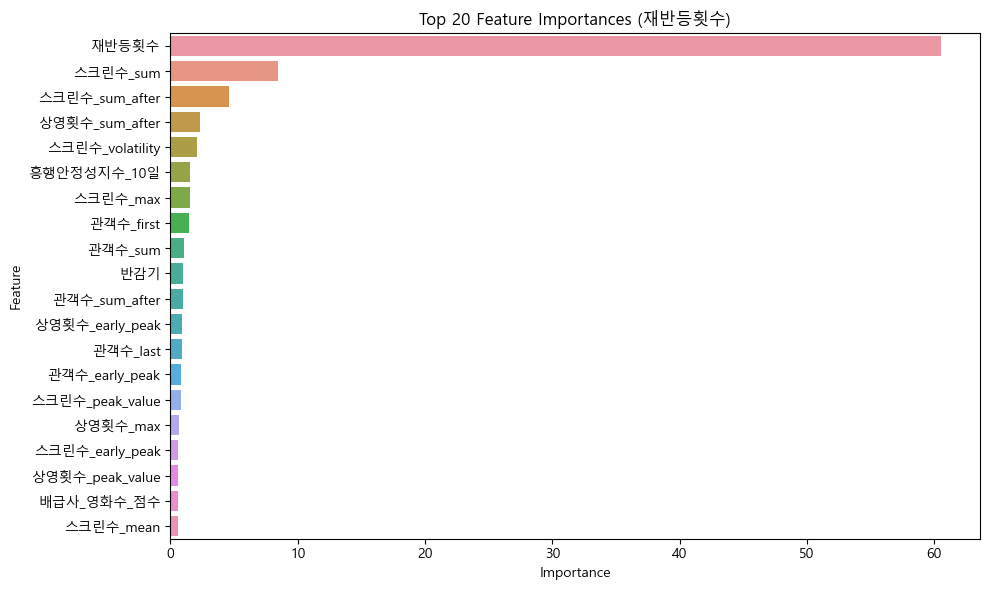


üìä Feature Importance for: 3ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò


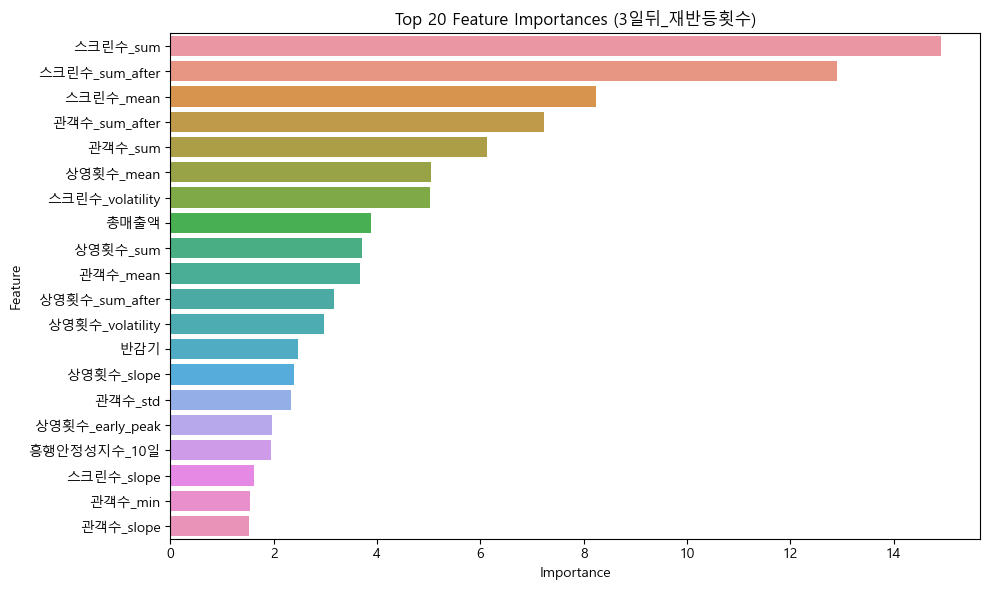


üìä Feature Importance for: 7ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò


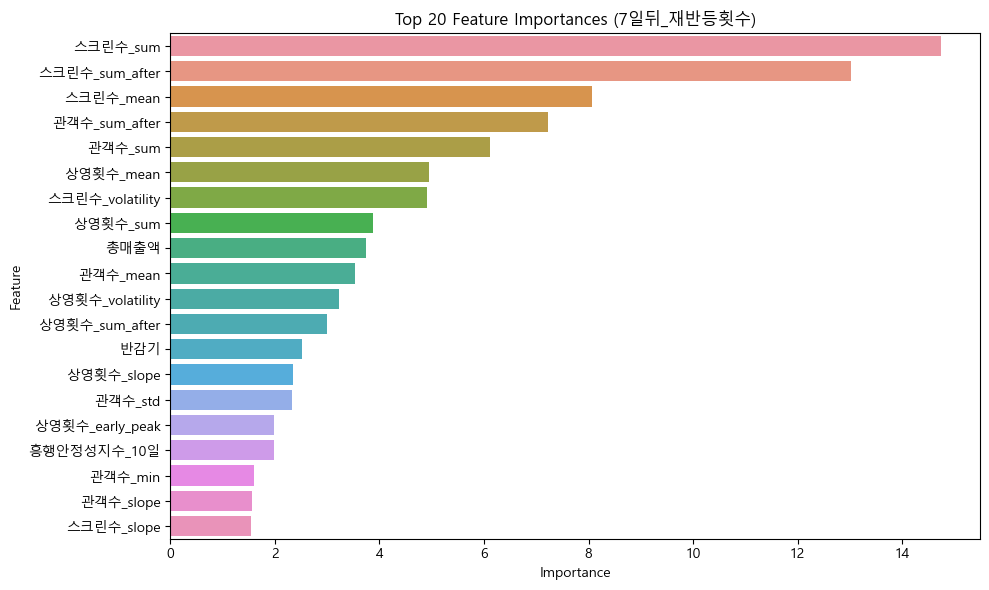


üìä Feature Importance for: 10ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò


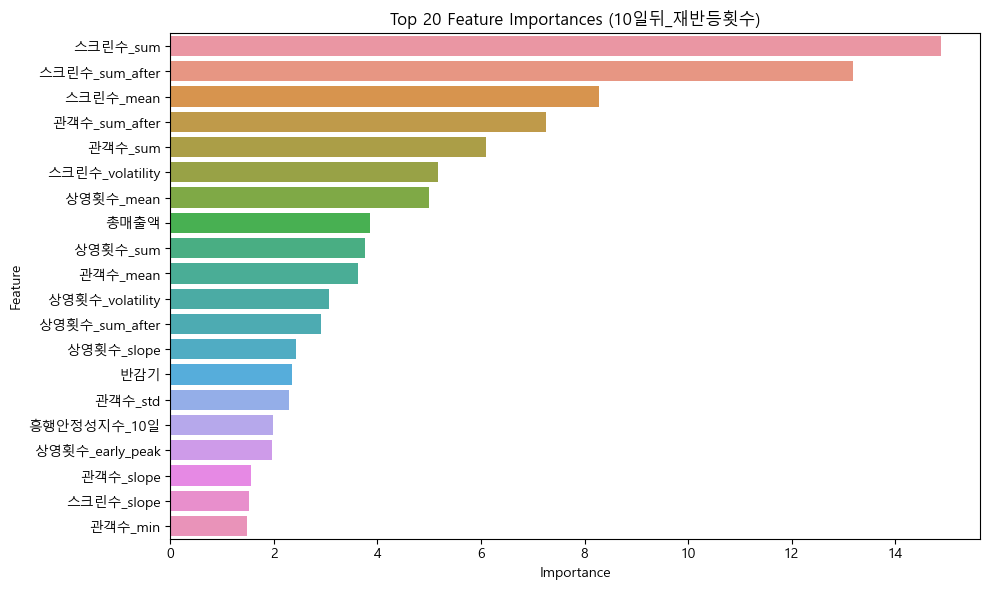

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows Í∏∞Ï§Ä)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

def plot_feature_importance(model, feature_names, top_n=20, title_suffix=""):
    importances = model.get_feature_importance()
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f'Top {top_n} Feature Importances ({title_suffix})')
    plt.tight_layout()
    plt.show()

# üìä Î™®Îì† Î™®Îç∏Ïóê ÎåÄÌï¥ ÏãúÍ∞ÅÌôî Î∞òÎ≥µ
for rebound in rebound_columns:
    print(f"\nüìä Feature Importance for: {rebound}")
    plot_feature_importance(trained_models[rebound], feature_sets[rebound], top_n=20, title_suffix=rebound)


# 7ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò + ÎπÑÏïïÏ∂ï

In [24]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv("final_data_rebounds.csv")

# ÌÉÄÍ≤ü Î∞è ÏÑ†ÌÉùÌï† ÌîºÏ≤ò
target = 'ÏÉÅÏòÅÏùºÏàò'
rebound = '7ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò'
rebound_columns = ['Ïû¨Î∞òÎì±ÌöüÏàò', '3ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò', '7ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò', '10ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò']

# Í≤∞Ï∏°Í∞í Ï†úÍ±∞
df = df.dropna(subset=[target] + rebound_columns)

# Î≤îÏ£ºÌòï Ïª¨Îüº ÏãùÎ≥Ñ Î∞è NaN Ï≤òÎ¶¨
cat_features = df.select_dtypes(include='object').columns.tolist()
df[cat_features] = df[cat_features].fillna('missing')

# ÌîºÏ≤ò ÏÑ§Ï†ï: ÎÇòÎ®∏ÏßÄ Ïû¨Î∞òÎì± Ïª¨ÎüºÏùÄ Ï†úÍ±∞
excluded = [col for col in rebound_columns if col != rebound]
feature_cols = [col for col in df.columns if col != target and col not in excluded]

X = df[feature_cols]
y = df[target]

# ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Î™®Îç∏ ÌõàÎ†®
model = CatBoostRegressor(verbose=0, random_seed=42)
model.fit(X_train, y_train, cat_features=cat_features)

# ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("üìå '7ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò + ÎπÑÏïïÏ∂ï' Î™®Îç∏ ÏÑ±Îä•:")
print(f"MAE: {mae:.3f}")
print(f"R¬≤ : {r2:.3f}")


üìå '7ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò + ÎπÑÏïïÏ∂ï' Î™®Îç∏ ÏÑ±Îä•:
MAE: 1.043
R¬≤ : 0.982


# XAI

### SHAP, PDP/ICE

### SHAP

In [31]:
import sys
!{sys.executable} -m pip install shap

   --------------------------------------- 462.1/462.1 kB 14.6 MB/s eta 0:00:00
   ---------------------------------------- 2.5/2.5 MB 39.7 MB/s eta 0:00:00
   ---------------------------------------- 23.2/23.2 MB 34.4 MB/s eta 0:00:00


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


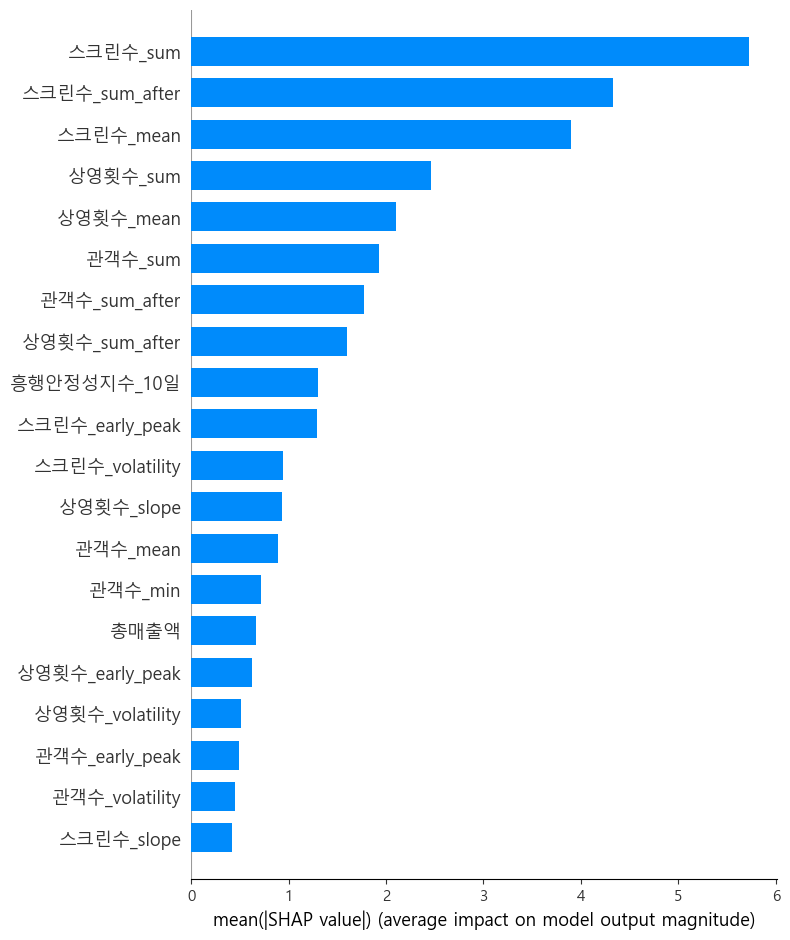

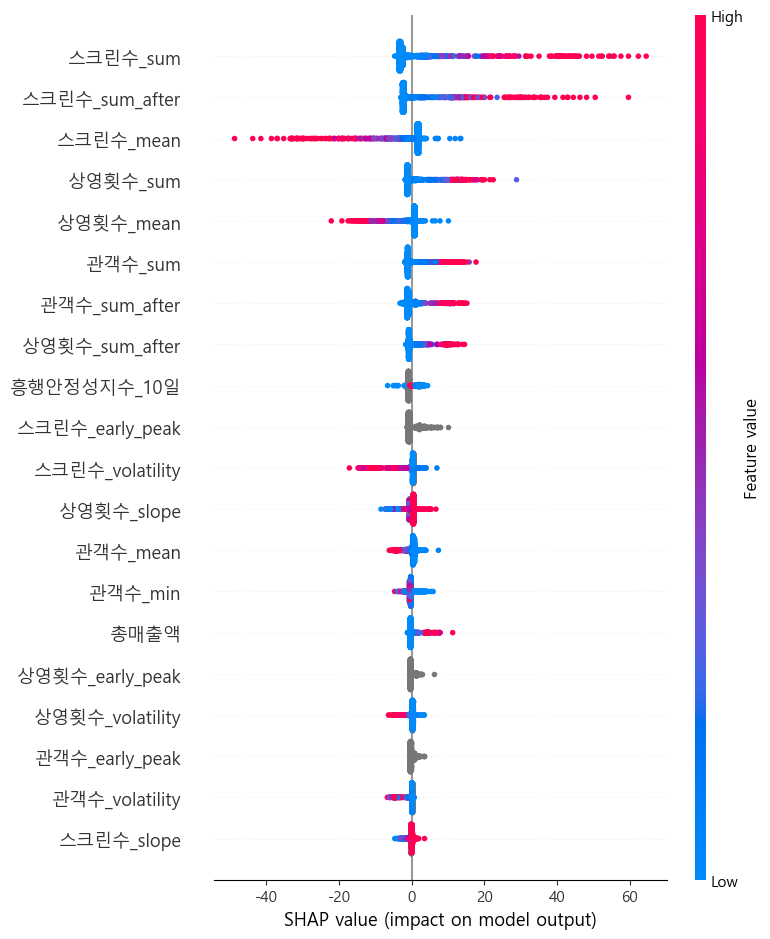

In [33]:
import shap

# SHAP Explainer ÏÉùÏÑ±
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Ï†ÑÏ≤¥ feature Ï§ëÏöîÎèÑ ÏöîÏïΩ ÌîåÎ°Ø
shap.summary_plot(shap_values, X_test, plot_type="bar")

# ÏÉÅÏÑ∏Ìïú Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî (Ïòà: 7ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò)
shap.summary_plot(shap_values, X_test)


Í∞íÏù¥ ÏñëÏàò: Î™®Îç∏Ïù¥ ÏòàÏ∏°Ìïú ÏÉÅÏòÅÏùºÏàò Ï¶ùÍ∞ÄÏóê Í∏∞Ïó¨ <br>
Í∞íÏù¥ ÏùåÏàò: Î™®Îç∏Ïù¥ ÏòàÏ∏°Ìïú ÏÉÅÏòÅÏùºÏàò Í∞êÏÜåÏóê Í∏∞Ïó¨

Í∞íÏù¥ 0Ïóê Í∞ÄÍπåÏõÄ: Î™®Îç∏Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•Ïù¥ ÏûëÏùå 

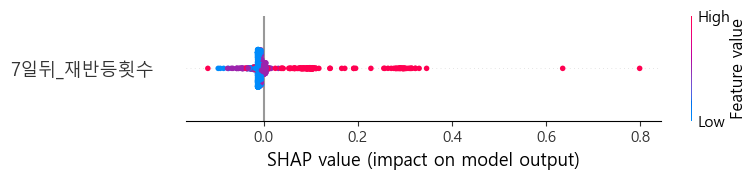

In [48]:
import shap

# SHAP Í∞í Í≥ÑÏÇ∞
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# ÎåÄÏÉÅ ÌîºÏ≤ò ÏÑ†ÌÉù
feature_name = '7ÏùºÎí§_Ïû¨Î∞òÎì±ÌöüÏàò'
X_subset = X_test[[feature_name]]  # ‚úÖ DataFrame ÌòïÌÉú Ïú†ÏßÄ
shap_subset = shap_values[:, X_test.columns.get_loc(feature_name)].reshape(-1, 1)

# summary plot
shap.summary_plot(
    shap_subset,
    features=X_subset,
    feature_names=[feature_name]
)


### LIME

CatboostÏôÄ Îã¨Î¶¨ LIMEÏùÄ ÏàòÏπòÌòïÎßå Ï≤òÎ¶¨Í∞Ä Í∞ÄÎä•ÌïòÏó¨ Î∂ÄÏ†ïÌôïÌï¥Ïßà Ïàò ÏûàÎã§Í≥† ÌåêÎã®

### PDP/ICE

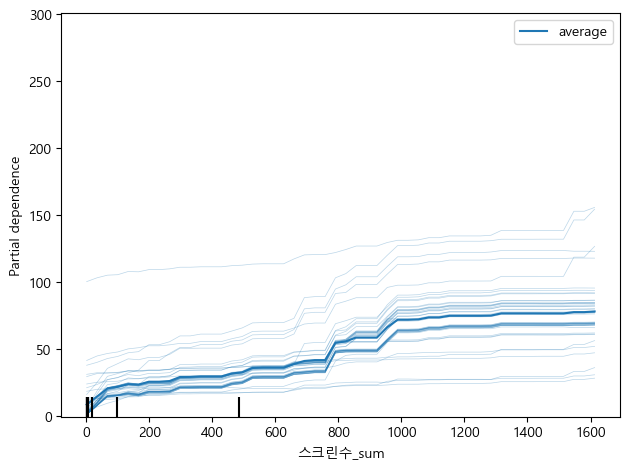

In [45]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# ÏãúÍ∞ÅÌôîÌï† ÌîºÏ≤ò ÏßÄÏ†ï
features_to_plot = [('Ïä§ÌÅ¨Î¶∞Ïàò_sum')]  # ÎòêÎäî Îã§Î•∏ Ï§ëÏöî ÌîºÏ≤ò Ïù¥Î¶Ñ

# PartialDependenceDisplay ÏÉùÏÑ±
display = PartialDependenceDisplay.from_estimator(
    estimator=model,
    X=X_test,
    features=features_to_plot,
    kind='both',  # 'average' = PDP, 'individual' = ICE, 'both' = PDP+ICE
    subsample=50,  # ICE Í∑∏Î¶¥ Îïå ÏÇ¨Ïö©Ìï† ÏÉòÌîå Ïàò (ÎÑàÎ¨¥ ÎßéÏúºÎ©¥ ÎäêÎ†§Ïßê)
    grid_resolution=50,  # xÏ∂ï Ï†ê Í∞úÏàò
    random_state=42
)

# ÏãúÍ∞ÅÌôî Ï∂úÎ†•
plt.tight_layout()
plt.show()

800 ~ 1000 Íµ¨Í∞ÑÏù¥ Î™®Îç∏Ïù¥ Ï§ëÏöîÌïòÍ≤å Ïó¨Í∏∞Îäî ÏûÑÍ≥ÑÏ†êÏùº Ïàò ÏûàÏùå 